In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import json

from shapely.geometry import Polygon
from pathlib import Path

sys.path.append(str(Path.cwd()))

from plotting_constants import coarse_regions
from plotting_constants import colors as mode_colors
from data_utils import (
    prepare_egs_data,
    prepare_data_for_plot,
    get_capacity_data,
    adjust_lightness,
)

idx = pd.IndexSlice

In [56]:
years = list(range(1990, 2055, 5))

capex_template = str(
    Path.cwd().parent.parent.parent /
    "cluster_data" /
    "breyer_sweep" /
    "egs_costs_s_72_{}.csv"
    )

year_costs = list()

for year in years:
    capex = pd.read_csv(capex_template.format(year)).set_index("name")["capex_mean"]
    year_costs.append(capex)

year_costs = pd.concat(year_costs, axis=1).T
year_costs.index = years
year_costs = year_costs.T
year_costs = year_costs.loc[:, "2000":].iloc[:,::-1]

year_costs

,2050,2045,2040,2035,2030,2025,2020,2015,2010,2005,2000
name,,,,,,,,,,,
AL1 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1 0,558.441477,636.202388,807.055099,1107.520773,1529.991367,1978.614086,2796.735173,4039.161827,5389.248298,7190.600046,9594.052111
BA1 0,1275.132709,1452.690225,1842.811462,2528.888025,3493.547878,4517.922904,6386.002195,9320.735949,12436.184163,16592.968344,22139.154168
BE1 0,911.649527,1038.593353,1317.508511,1808.015396,2497.693962,3230.065582,4565.639196,6642.088179,8862.200611,11824.383771,15776.674181
BG1 0,905.560277,1031.656198,1308.708376,1795.938982,2481.010926,3208.490760,4535.143576,6597.214148,8802.327473,11744.498087,15670.086773
...,...,...,...,...,...,...,...,...,...,...,...
RS1 0,874.830067,996.646920,1264.297326,1734.993749,2396.817760,3099.610548,4381.243369,6370.751378,8500.169711,11341.344345,15132.179230
SE2 0,1111.511721,1266.285619,1606.347735,2204.389127,3045.266885,3938.197354,5566.570630,8114.949776,10827.364968,14446.402674,19275.100715
SE2 1,1126.432777,1283.284377,1627.911524,2233.981091,3086.146885,3991.064151,5641.296891,8224.908795,10974.077698,14642.154012,19536.281775


In [57]:
regions = gpd.read_file(
    Path.cwd().parent.parent.parent /
    "cluster_data" /
    "old_data" /
    "resources" /
    "regions_onshore_elec_s_72.geojson"
    ).set_crs("EPSG:4326").set_index("name")

root = str(Path.cwd().parent.parent.parent / "cluster_data" / "{}_data")

In [58]:
prepared_data = prepare_egs_data(Path.cwd().parent / "data" / "egs_costs.json")

<AxesSubplot:>

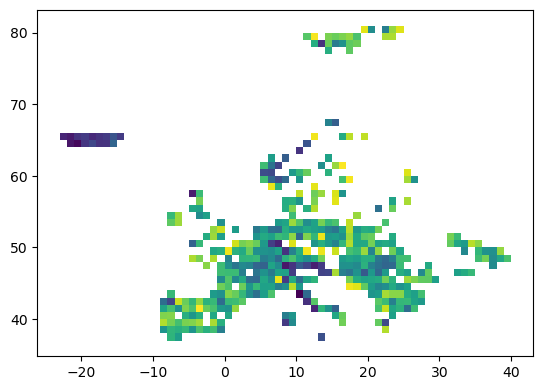

In [59]:
prepared_data[2050].plot(column="CAPEX")

In [60]:
op = "static"

results_chp = get_capacity_data("chp", op).loc[:,'2000':].iloc[:,::-1]
results_dh = get_capacity_data("dh", op).loc[:,'2000':].iloc[:,::-1]

In [61]:

# region_name = "Southern-Central Germany"
region_name = "all"

years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]

c1 = (0/255,139/255,251/255)
c2 = (255/255,0/255,81/255)

colors = [c1, c2]

cm = [plt.cm.colors.to_hex(c) for c in np.linspace(c1, c2, len(years))]


In [62]:
results_dh

egs_capex,2050,2045,2040,2035,2030,2025,2020,2015,2010,2005,2000
AL1 0,3.796943e-07,5.432711e-07,3.933412e-07,3.600573e-07,4.866621e-07,5.086172e-07,4.320991e-07,5.084083e-07,5.362533e-07,4.322383e-07,5.131944e-07
AT1 0,2.877835e+00,2.848408e+00,2.809478e+00,2.756404e+00,2.926533e+00,2.782871e+00,2.194285e+00,7.843595e-01,2.936931e-06,9.245982e-07,5.725089e-07
BA1 0,1.903284e-01,1.855644e-01,1.841468e-01,1.608728e-01,4.992683e-05,3.306373e-06,9.810657e-07,5.554766e-07,3.793631e-07,2.046072e-07,1.503040e-07
BE1 0,3.234376e+00,3.019767e+00,2.890713e+00,2.313842e+00,1.733891e+00,1.425091e+00,4.873940e-06,1.119848e-06,6.379184e-07,3.295075e-07,2.488595e-07
BG1 0,1.313980e+00,1.258487e+00,1.205744e+00,1.178624e+00,1.070172e+00,5.498093e-01,3.805241e-06,1.116035e-06,6.497361e-07,3.282883e-07,2.511408e-07
...,...,...,...,...,...,...,...,...,...,...,...
RS1 0,1.803734e+00,1.785134e+00,1.737283e+00,1.596259e+00,1.551674e+00,7.211182e-01,6.134422e-06,1.248672e-06,6.973038e-07,3.493447e-07,2.671520e-07
SE2 0,7.169525e+00,7.043756e+00,6.467547e+00,6.037617e+00,5.445183e+00,4.856384e+00,8.168887e-06,9.893915e-07,5.392927e-07,2.702981e-07,1.932330e-07
SE2 1,3.622943e-02,3.610883e-02,3.557831e-02,3.533334e-02,3.467705e-02,3.188338e-02,4.090432e-06,8.813290e-07,5.089649e-07,2.529947e-07,1.859295e-07
SI1 0,4.487763e-01,4.486401e-01,4.468233e-01,4.443883e-01,4.172333e-01,3.003794e-01,1.245965e-01,2.201952e-06,9.648216e-07,4.668580e-07,3.475463e-07


In [63]:
def sum_capacity(xs, ys):

    c = np.concatenate(xs)
    joint_x = np.linspace(c.min(), c.max(), 200)
    total = np.zeros_like(joint_x)

    for x, y in zip(xs, ys):
        total += np.interp(joint_x, x, y)
    return joint_x, total

Southern-Central Germany


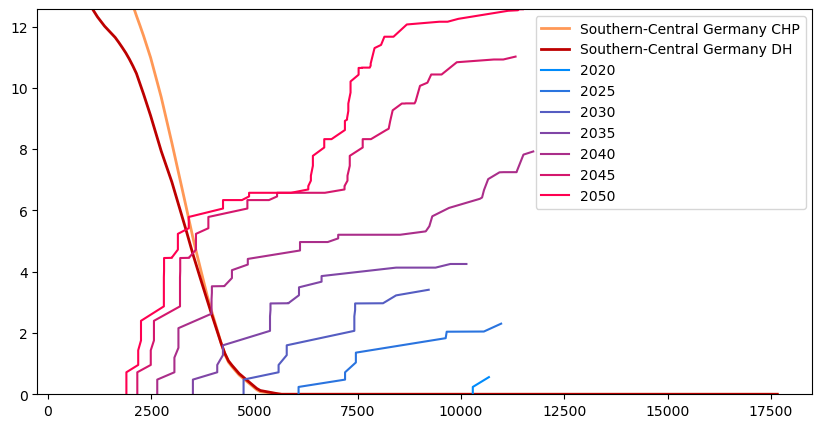

Northern Germany


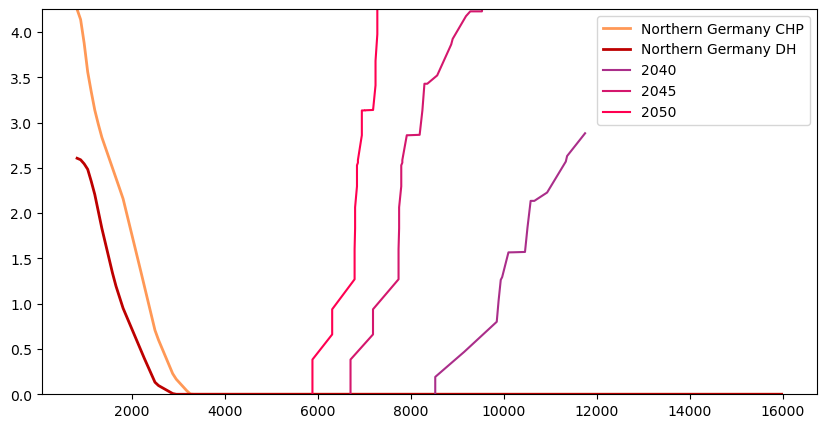

Northern Italy, Slovenia


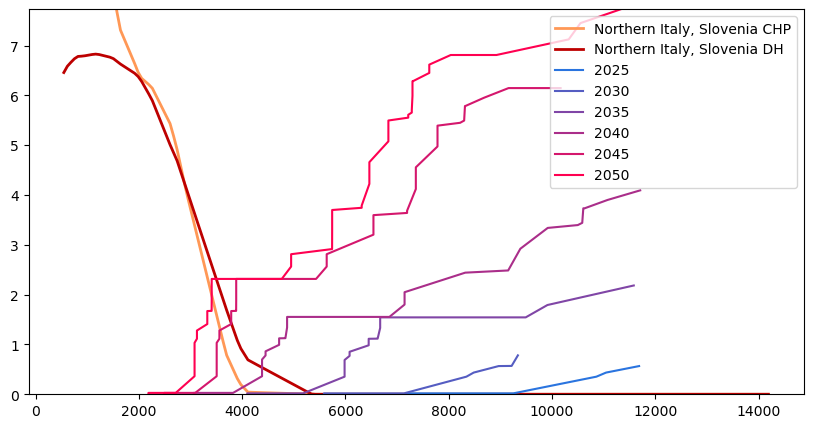

Southern Italy


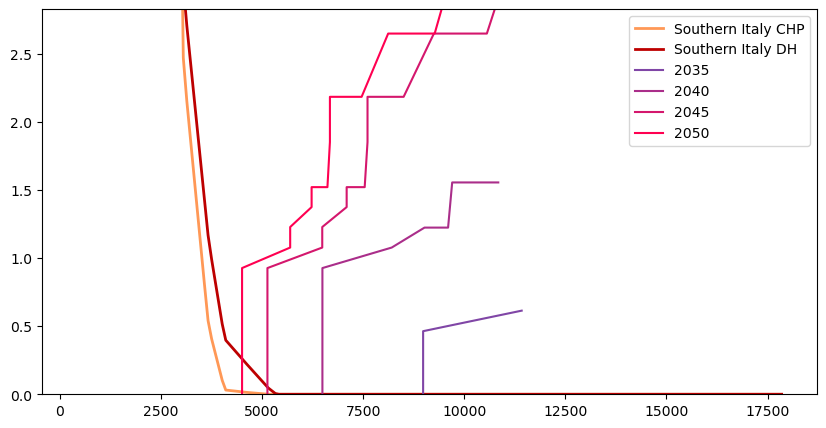

Western Poland


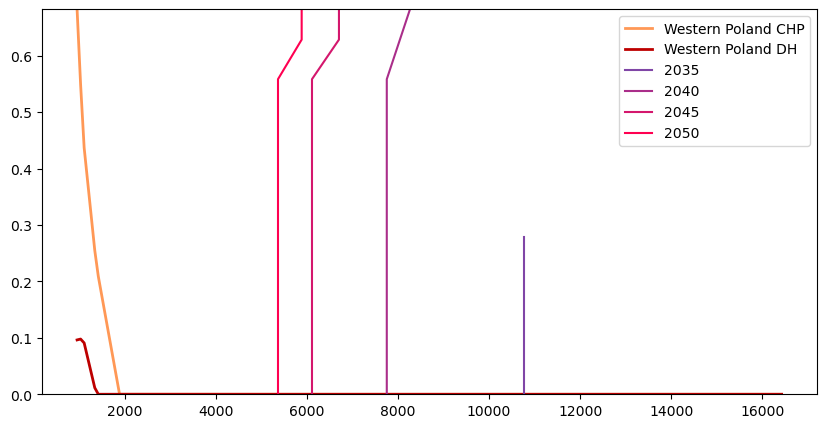

Eastern Poland


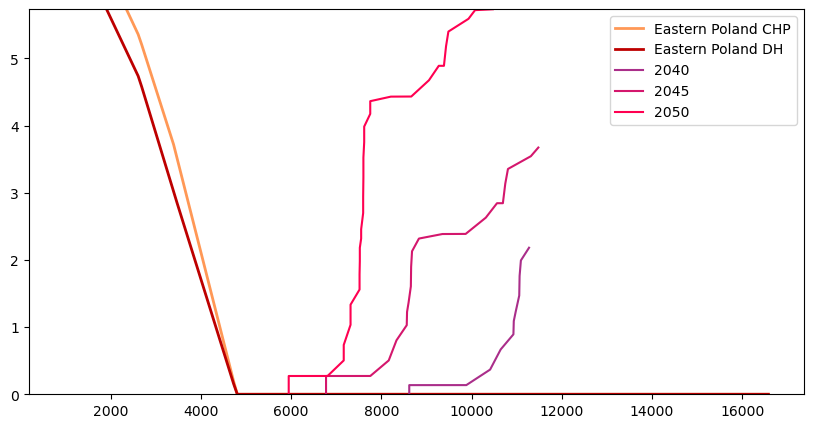

Scandinavia (w/o DK)


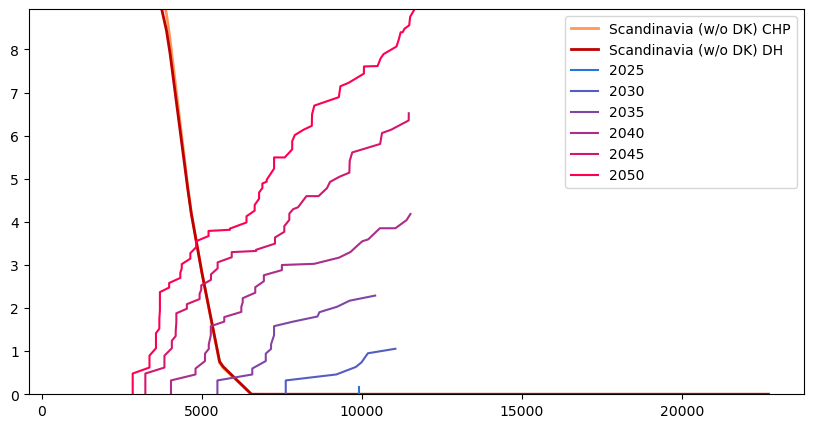

Denmark


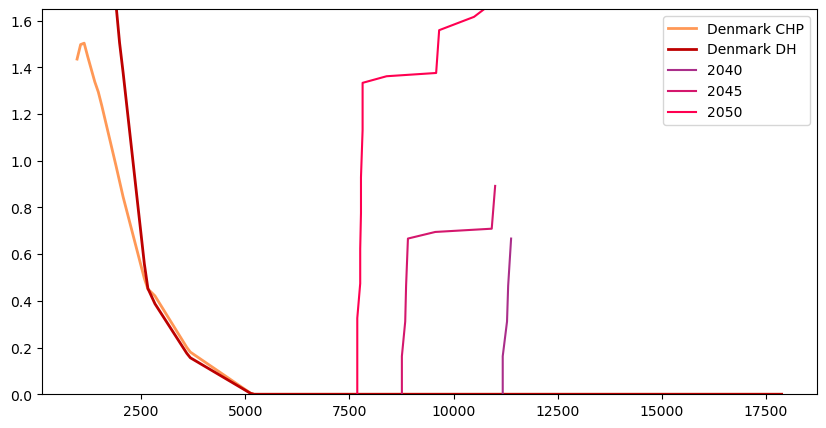

Ireland


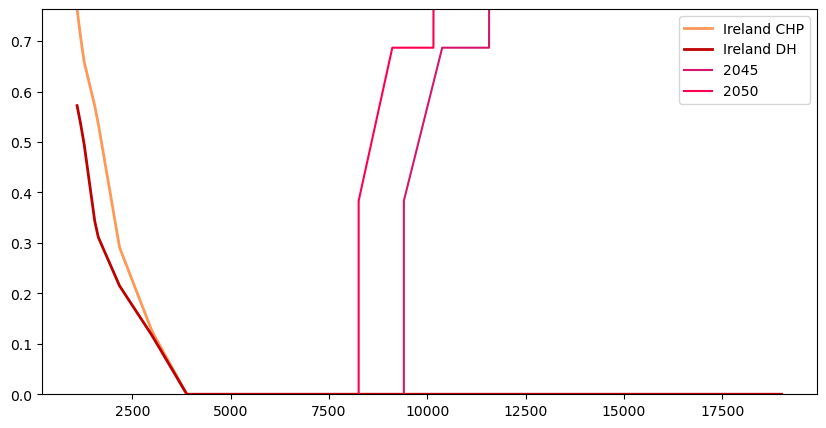

Baltic States


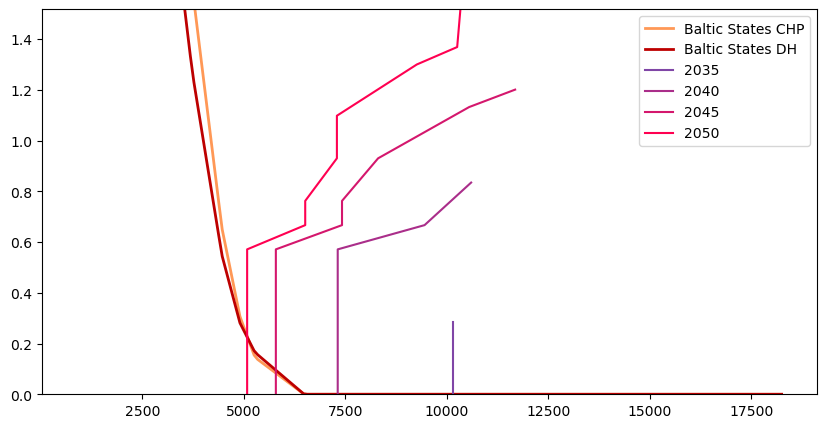

Great Britain


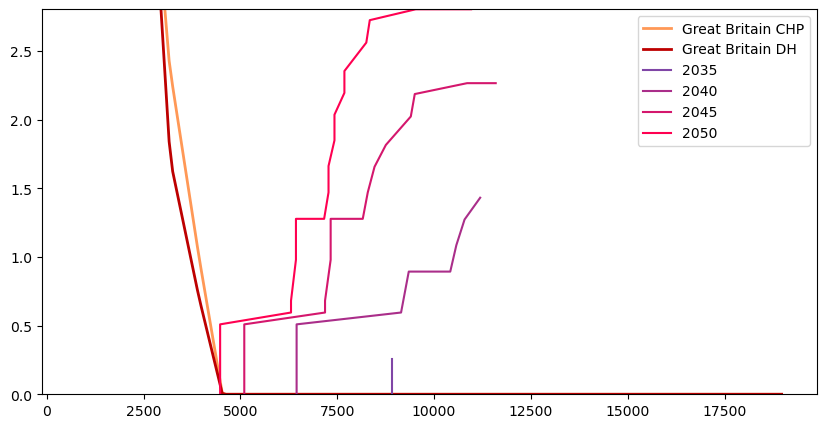

Northern France


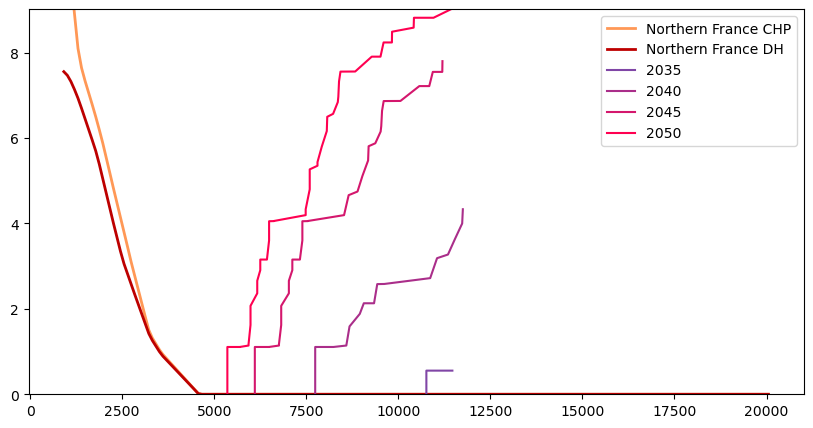

Southern France


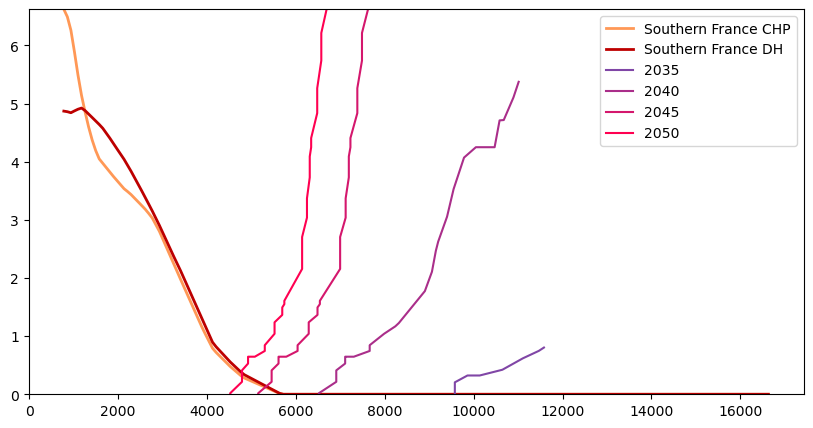

Eastern France


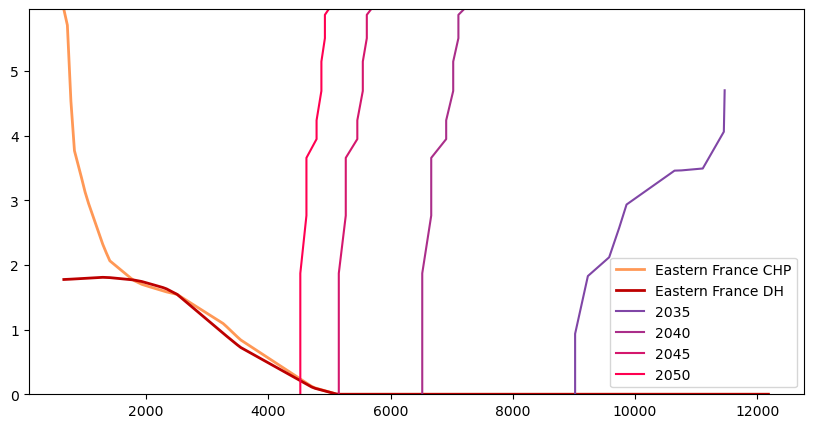

Benelux


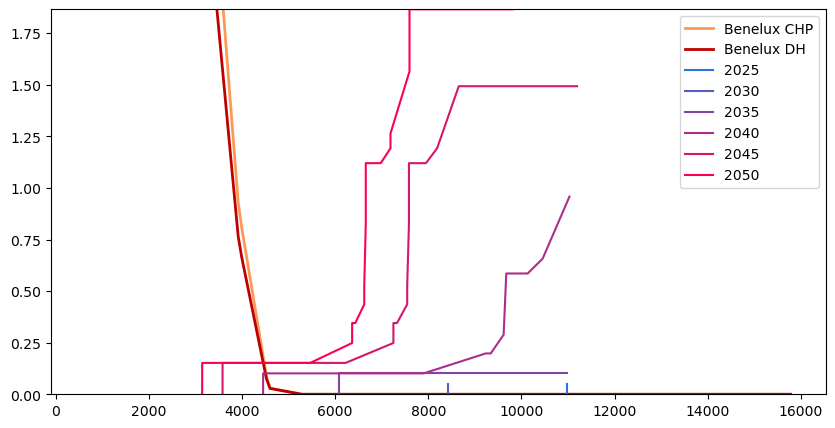

Iberia


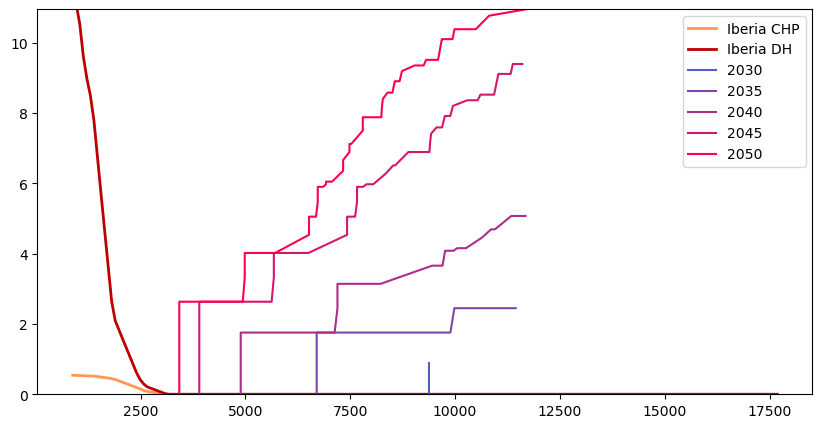

Austria


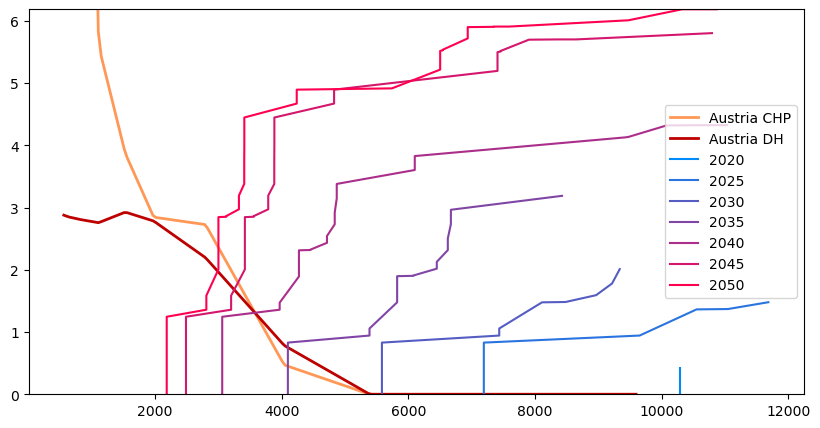

Switzerland


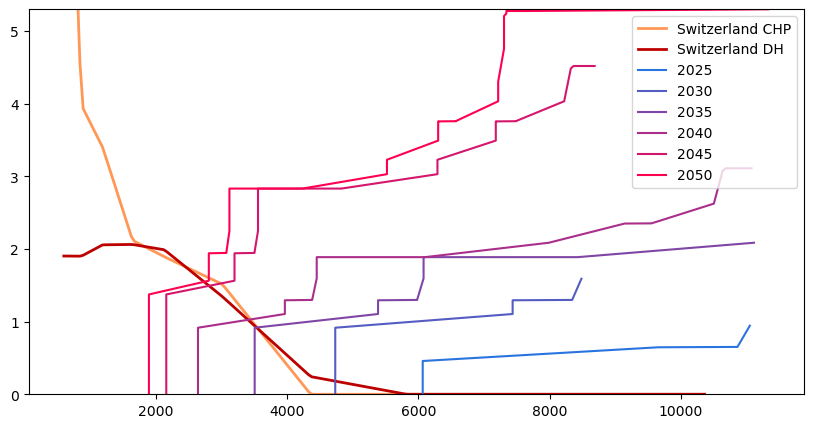

Czech Republic, Slovakia


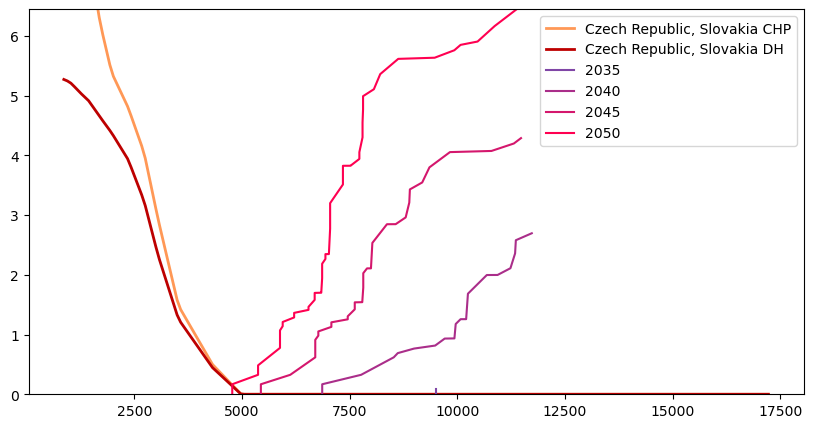

Romania, Bulgaria, Serbia, Hungary


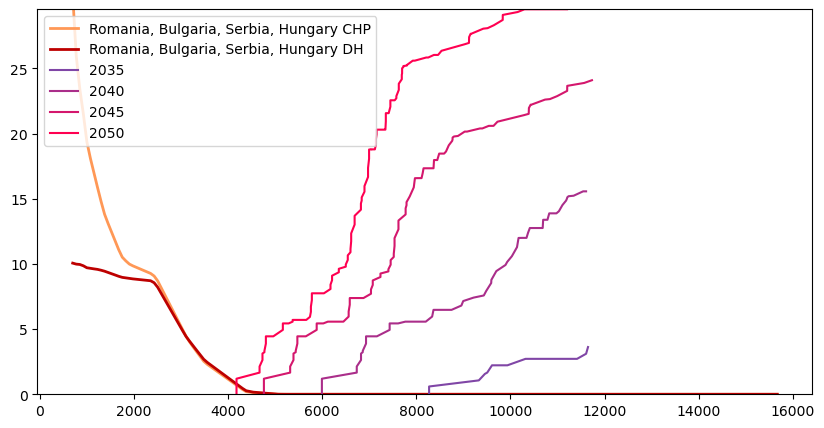

Bosnia, Montenegro, Albania, Croatia


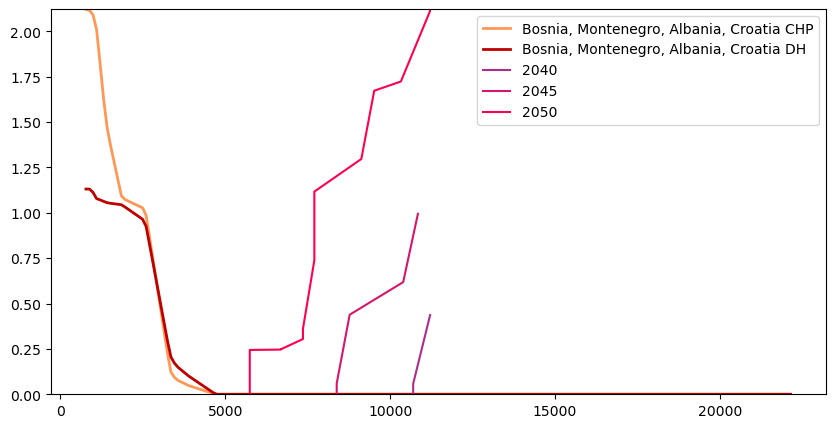

Mazedonia, Greece


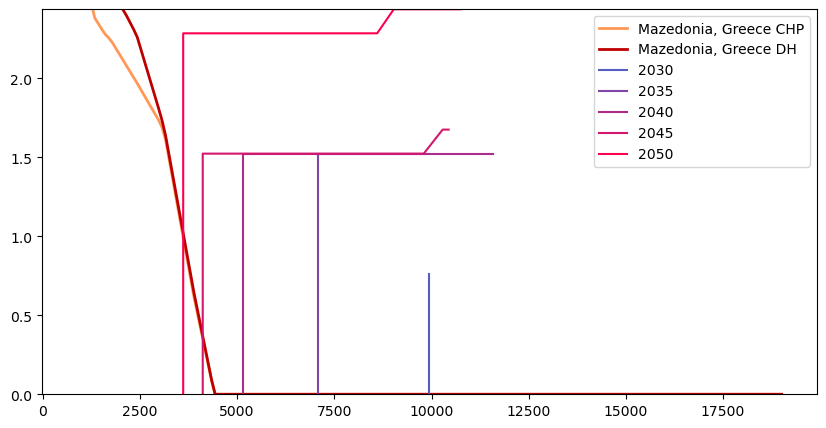

In [64]:
for region_name in coarse_regions.keys():
    print(region_name)
        
    fig, ax = plt.subplots(figsize=(10, 5))

    if region_name == "all":
        buses = results_chp.index
    else:
        buses = results_chp.loc[coarse_regions[region_name]].index 

    costs = list()
    chp_ys = list()
    dh_ys = list()

    for bus in buses:
        if year_costs.loc[bus].isna().any():
            continue
        costs.append(year_costs.loc[bus].values)
        chp_ys.append(results_chp.loc[bus].values)
        dh_ys.append(results_dh.loc[bus].values)

    xs, chp_ys = sum_capacity(costs, chp_ys)
    xs, dh_ys = sum_capacity(costs, dh_ys)

    line_kwargs = {
        "linewidth": 2,
        }

    ax.plot(
        # plot_data_chp.index.astype(int),
        # plot_data_chp.values,
        xs,
        chp_ys,
        label={"all": "Europe"}.get(region_name, region_name) + " CHP",
        color=adjust_lightness(mode_colors['chp'], 0.8),
        **line_kwargs,
        )
    ax.plot(
        xs,
        dh_ys,
        # plot_data_dh.index.astype(int),
        # plot_data_dh.values,
        label={"all": "Europe"}.get(region_name, region_name) + " DH",
        color=adjust_lightness(mode_colors['dh'], 0.8),
        **line_kwargs,
        )

    for i, year in enumerate(years):
        year_data = prepare_data_for_plot(
            prepared_data,
            region_name,
            year,
            sustainability_factor=1.)[["CAPEX", "HeatPower_cumsum"]]
        year_data = year_data.loc[year_data["HeatPower_cumsum"] > 0.01]

        if year_data.empty:
            continue

        year_data = pd.concat((pd.DataFrame({
                "CAPEX": [year_data["CAPEX"].iloc[0]],
                "HeatPower_cumsum": [0]
            }), year_data))

        ax.plot(year_data["CAPEX"], year_data["HeatPower_cumsum"], label=year, color=cm[i])

    ax.set_ylim(0, min(max(
        chp_ys.max(),
        dh_ys.max(),
        ), year_data["HeatPower_cumsum"].max())
        )
    ax.legend()
    plt.show()

In [17]:
results_elec = get_capacity_data("elec", op)

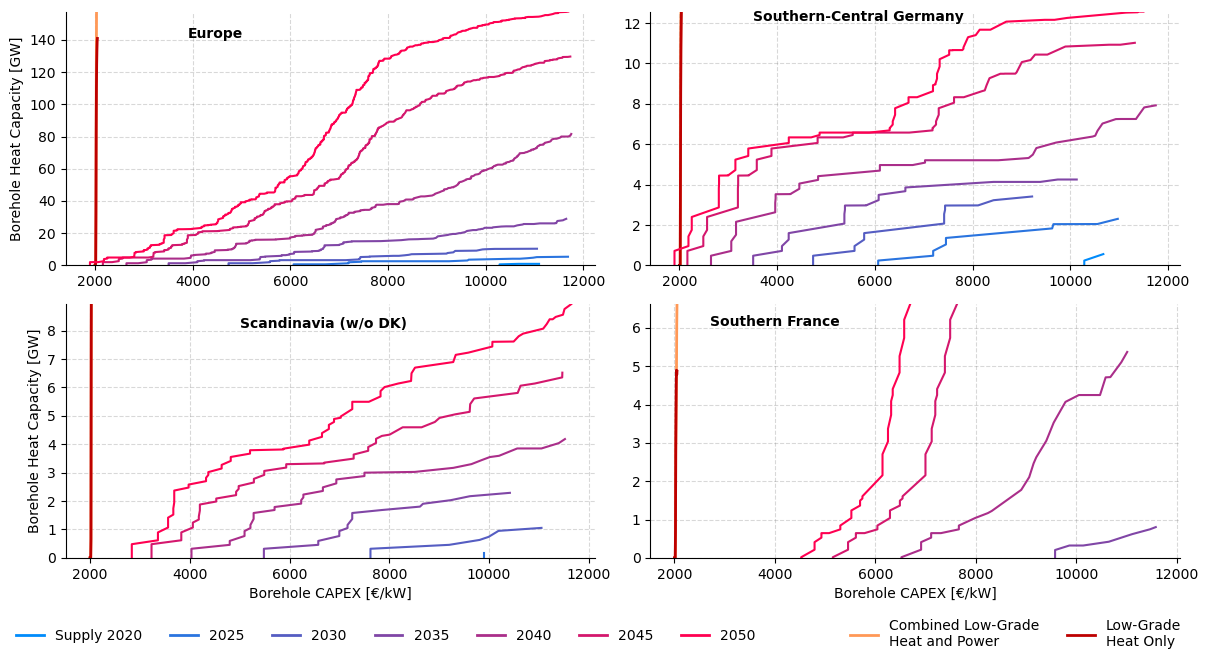

In [65]:
region_names = [
    "all",
    "Southern-Central Germany",
    "Scandinavia (w/o DK)",
    "Southern France",
    ]

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for region_name, ax in zip(region_names, axs.flatten()):
    if region_name == "all":
        plot_data_chp = results_chp.sum()
        plot_data_dh = results_dh.sum()
        # plot_data_elec = results_elec.sum()
    else:
        plot_data_chp = results_chp.loc[coarse_regions[region_name]].sum()
        plot_data_dh = results_dh.loc[coarse_regions[region_name]].sum()
        # plot_data_elec = results_elec.loc[coarse_regions[region_name]].sum()

    line_kwargs = {
        "linewidth": 2,
        }

    ax.plot(
        plot_data_chp.index.astype(int),
        plot_data_chp.values,
        # label={"all": "Europe"}.get(region_name, region_name) + " CHP",
        color=adjust_lightness(mode_colors['chp'], 0.8),
        **line_kwargs,
        )
    ax.plot(
        plot_data_dh.index.astype(int),
        plot_data_dh.values,
        # label={"all": "Europe"}.get(region_name, region_name) + " DH",
        color=adjust_lightness(mode_colors['dh'], 0.8),
        **line_kwargs,
        )
    """
    ax.plot(
        plot_data_elec.index.astype(int),
        plot_data_elec.values,
        # label={"all": "Europe"}.get(region_name, region_name) + " DH",
        color=adjust_lightness(mode_colors['elec'], 0.8),
        **line_kwargs,
        )
    """

    for i, year in enumerate(years):
        year_data = prepare_data_for_plot(
            prepared_data,
            region_name,
            year,
            sustainability_factor=1.)[["CAPEX", "HeatPower_cumsum"]]
        year_data = year_data.loc[year_data["HeatPower_cumsum"] > 0.01]

        if year_data.empty:
            continue

        year_data = pd.concat((pd.DataFrame({
                "CAPEX": [year_data["CAPEX"].iloc[0]],
                "HeatPower_cumsum": [0]
            }), year_data))

        ax.plot(year_data["CAPEX"], year_data["HeatPower_cumsum"], label=year, color=cm[i])

    ax.set_ylim(0, min(max(
        plot_data_chp.max(),
        plot_data_dh.max(),
        ), year_data["HeatPower_cumsum"].max())
        )


handles = []
labels = []

for i, year in enumerate(years):
    handles.append(plt.Line2D([0], [0], color=cm[i], linewidth=2))
    if i == 0:
        labels.append(f"Supply {year}")
    else:
        labels.append(year)

handles.append(plt.Line2D([0], [0], color='w'))
labels.append("")

handles.append(plt.Line2D([0], [0], color=adjust_lightness(mode_colors['chp'], 0.8), linewidth=2))
labels.append("Combined Low-Grade\nHeat and Power")

handles.append(plt.Line2D([0], [0], color=adjust_lightness(mode_colors['dh'], 0.8), linewidth=2))
labels.append("Low-Grade\nHeat Only")

# handles.append(plt.Line2D([0], [0], color=adjust_lightness(mode_colors['elec'], 0.8), linewidth=2))
# labels.append("Electricity")

plt.tight_layout()
axs[1,0].legend(
    handles,
    labels,
    bbox_to_anchor=(2.13, -0.41),
    loc='lower right',
    frameon=False,
    ncol=11,
    fancybox=False,
)

for ax in axs.flatten():
    ax.grid(linestyle="--", color="grey", alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

for ax in axs[:, 0]:
    ax.set_ylabel("Borehole Heat Capacity [GW]")
for ax in axs[-1, :]:
    ax.set_xlabel("Borehole CAPEX [{}/kW]".format(u"\N{euro sign}"))

axs[0,0].text(3900, 141, "Europe", fontweight="bold")
axs[0,1].text(3500, 12.1, region_names[1], fontweight="bold")
axs[1,0].text(5000, 8.075, region_names[2], fontweight="bold")
axs[1,1].text(2700, 6.05, region_names[3], fontweight="bold")

plt.savefig("supply_demand.pdf", bbox_inches="tight")
plt.show()

In [13]:
import pandas as pd
import numpy as np
import pypsa

buses = pd.Index(["a", "b"])

efficiencies = pd.Series([0.5, 0.6], buses)
cc = pd.Series([0.5, np.inf], buses)

n = pypsa.Network()
n.madd("Bus", buses)

n.madd(
    "Generator",
    buses,
    suffix=" chp",
    bus=buses,
    efficiency=efficiencies,
    capital_cost=cc,
    p_nom_extendable=True,
)

n.madd(
    "Load",
    buses,
    suffix=" elec",
    bus=buses,
    p_set=1,
)

n.optimize(solver_name="gurobi")

c:\Users\lukas\miniforge3\envs\pypsa-eur\lib\site-packages\linopy\expressions.py:176: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'Generator' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  ds = self.data.assign_coords({group_dim: idx})
INFO:linopy.model: Solve problem using Gurobi solver


Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file C:\Users\lukas\AppData\Local\Temp\linopy-problem-65rxxlx8.lp
Reading time = 0.01 seconds
obj: 8 rows, 4 columns, 10 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i7-12650H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 8 rows, 4 columns and 10 nonzeros
Model fingerprint: 0x155dc4a5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 1e+100]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 8 rows and 4 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   1.0000000e+100   0.000000e+

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 4 primals, 8 duals
Objective: inf
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-ext-p-lower, Generator-ext-p-upper were not assigned to the network.


('ok', 'optimal')